In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
pip install xgboost

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 10.0 MB/s eta 0:00:00


In [ ]:
# Read csv
df = pd.read_csv('bitcoin_final.csv')

In [ ]:
df.head()

,date,btc_price,cpi,ppi,fed_funds_rate,sp500,nasdaq,btc_volume,us_m2_scaled,global_m2,...,ppi_lag_1m,ppi_lag_3m,us_m2_future_108,global_m2_future_108,us_m2_rolling_avg_30,global_m2_rolling_avg_30,us_m2_pct_change_30,global_m2_pct_change_30,m2_cpi_ratio,m2_ppi_ratio
0,2015-01-02,315.032013,234.766194,191.970968,0.11,2058.199951,4726.810059,7860650.0,1.178880e+13,6.112517e+15,...,191.970968,191.970968,1.193760e+13,6.309771e+15,NaN,NaN,NaN,NaN,5.021507e+10,6.140929e+10
1,2015-01-03,281.082001,234.785387,191.941935,0.11,2058.199951,4726.810059,33054400.0,1.178880e+13,6.112517e+15,...,191.970968,191.970968,1.193760e+13,6.309771e+15,NaN,NaN,NaN,NaN,5.021096e+10,6.141857e+10
2,2015-01-04,264.195007,234.804581,191.912903,0.11,2058.199951,4726.810059,55629100.0,1.178880e+13,6.112517e+15,...,191.941935,191.970968,1.193760e+13,6.309771e+15,NaN,NaN,NaN,NaN,5.020686e+10,6.142787e+10
3,2015-01-05,274.473999,234.823774,191.883871,0.11,2020.579956,4652.569824,43962800.0,1.178880e+13,6.112517e+15,...,191.912903,191.970968,1.193760e+13,6.309771e+15,NaN,NaN,NaN,NaN,5.020275e+10,6.143716e+10
4,2015-01-06,286.188995,234.842968,191.854839,0.11,2002.609985,4592.740234,23245700.0,1.178880e+13,6.112517e+15,...,191.883871,191.941935,1.193760e+13,6.309771e+15,NaN,NaN,NaN,NaN,5.019865e+10,6.144646e+10


In [ ]:
df.columns.tolist()

['date',
 'btc_price',
 'cpi',
 'ppi',
 'fed_funds_rate',
 'sp500',
 'nasdaq',
 'btc_volume',
 'us_m2_scaled',
 'global_m2',
 'month',
 'year',
 'bitcoin_price_lag_30',
 'bitcoin_price_lag_60',
 'bitcoin_price_lag_90',
 'bitcoin_price_lag_108',
 'bitcoin_price_lag_120',
 'bitcoin_price_rolling_avg_5',
 'bitcoin_price_rolling_avg_10',
 'bitcoin_price_rolling_avg_30',
 'bitcoin_price_rolling_avg_50',
 'cpi_lag_1m',
 'cpi_lag_3m',
 'ppi_lag_1m',
 'ppi_lag_3m',
 'us_m2_future_108',
 'global_m2_future_108',
 'us_m2_rolling_avg_30',
 'global_m2_rolling_avg_30',
 'us_m2_pct_change_30',
 'global_m2_pct_change_30',
 'm2_cpi_ratio',
 'm2_ppi_ratio']

In [ ]:
df.isna().sum()

,0
date,0
btc_price,0
cpi,0
ppi,0
fed_funds_rate,0
sp500,0
nasdaq,0
btc_volume,0
us_m2_scaled,0
global_m2,0


In [ ]:
# Apply forward fill
df.fillna(method='ffill', inplace=True)

<ipython-input-7-677dfca28c63>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# Apply backward fill if NaNs remain
df.fillna(method='bfill', inplace=True)

<ipython-input-8-fe4209f9839a>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
df.isna().sum()

,0
date,0
btc_price,0
cpi,0
ppi,0
fed_funds_rate,0
sp500,0
nasdaq,0
btc_volume,0
us_m2_scaled,0
global_m2,0


In [ ]:
# save new csv file
df.to_csv('bitcoin_final_filled.csv', index=False)

#download file
from google.colab import files
files.download('bitcoin_final_filled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Read csv
df = pd.read_csv('bitcoin_final_filled.csv')

# **XGBoost** Model:

In [ ]:
# Define features and target
features = [
    "cpi", "ppi", "fed_funds_rate", "sp500", "nasdaq", "btc_volume",
    "us_m2_scaled", "global_m2", "bitcoin_price_lag_30", "bitcoin_price_lag_60",
    "bitcoin_price_lag_90", "bitcoin_price_lag_108", "bitcoin_price_lag_120",
    "bitcoin_price_rolling_avg_5", "bitcoin_price_rolling_avg_10",
    "bitcoin_price_rolling_avg_30", "bitcoin_price_rolling_avg_50",
    "cpi_lag_1m", "cpi_lag_3m", "ppi_lag_1m", "ppi_lag_3m", "month", "year", "us_m2_future_108", "global_m2_future_108",
    "us_m2_rolling_avg_30", "global_m2_rolling_avg_30",
    "us_m2_pct_change_30", "global_m2_pct_change_30",
    "m2_cpi_ratio", "m2_ppi_ratio"
]
target = "btc_price"

In [ ]:
# Split data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize XGBoost Regressor
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=10, random_state=42)

In [ ]:
# Train the model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the results
print(f"XGBoost - MAE: {mae_xgb:.2f}")
print(f"XGBoost - RMSE: {rmse_xgb:.2f}")
print(f"XGBoost - R²: {r2_xgb:.4f}")

XGBoost - MAE: 480.86
XGBoost - RMSE: 944.92
XGBoost - R²: 0.9986


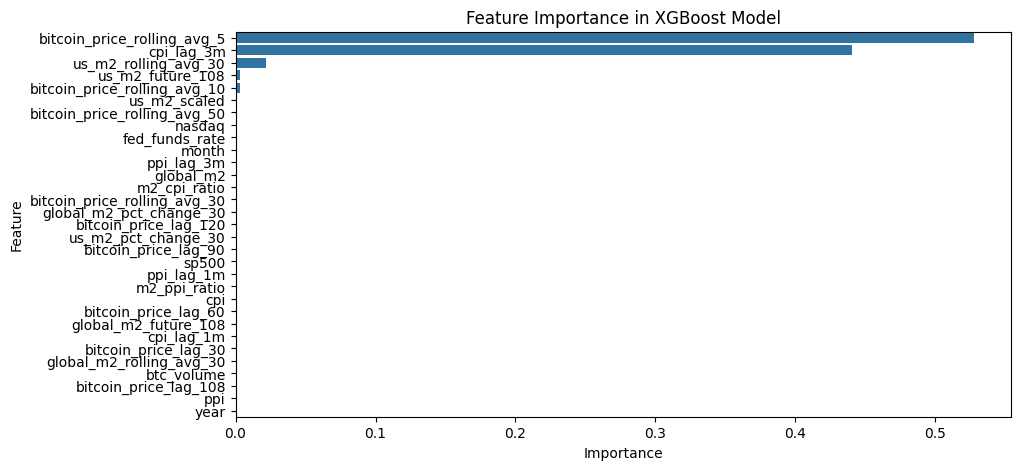

In [ ]:
# Get feature importance from XGBoost
xgb_importance = xgb.feature_importances_

# Create a dataframe to store feature importance
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": xgb_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance in XGBoost Model")
plt.show()

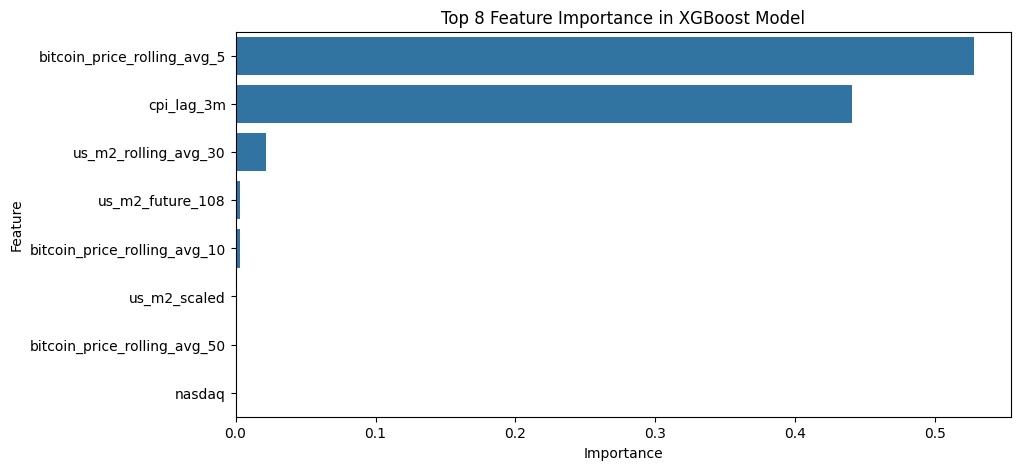

In [ ]:
# Plot top 8 feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(8))
plt.title("Top 8 Feature Importance in XGBoost Model")
plt.show()


Try removing less relevant features to improve model performance:

In [ ]:
# Select features with importance above a threshold
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()

# Update X_train and X_test with only important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

In [ ]:
# Initialize a new XGBoost model
xgb_model_selected = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model with selected features
xgb_model_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = xgb_model_selected.predict(X_test_selected)

# Evaluate performance
mae_selected = mean_absolute_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mean_squared_error(y_test, y_pred_selected))
r2_selected = r2_score(y_test, y_pred_selected)

print(f"MAE (Selected Features): {mae_selected:.2f}")
print(f"RMSE (Selected Features): {rmse_selected:.2f}")
print(f"R² (Selected Features): {r2_selected:.4f}")

MAE (Selected Features): 538.51
RMSE (Selected Features): 1104.94
R² (Selected Features): 0.9981


Results: Orgininal model seems to perform better.

Tune Hyperparameters to improve performance:

In [ ]:
# Optimize XGBoost Hyperparameters
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 10.0)
    }

    # Use Time Series Split for better validation
    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_index, val_index in tscv.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model = XGBRegressor(objective='reg:squarederror', **params)
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)

        rmse = np.sqrt(mean_squared_error(y_val_fold, preds))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Show the best parameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

[I 2025-04-04 16:40:01,769] A new study created in memory with name: no-name-31d0b91c-6bd9-4dd2-884c-01fa0b693d38
<ipython-input-39-9ffdf21a3e12>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.3),
<ipython-input-39-9ffdf21a3e12>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-39-9ffdf21a3e12>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5

Best hyperparameters: {'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.026577924308386087, 'subsample': 0.5409524380601207, 'colsample_bytree': 0.8528441804551664, 'gamma': 0.0027359333183660313, 'lambda': 0.016540776580647832, 'alpha': 0.004198110936068142}


In [ ]:
# Train the final XGBoost model using the best hyperparameters
xgb_final = XGBRegressor(objective='reg:squarederror', **best_params)
xgb_final.fit(X_train, y_train)

# Make predictions
y_pred_final = xgb_final.predict(X_test)

# Evaluate performance
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

print(f"Optimized XGBoost - MAE: {mae_final:.2f}")
print(f"Optimized XGBoost - RMSE: {rmse_final:.2f}")
print(f"Optimized XGBoost - R²: {r2_final:.4f}")

Optimized XGBoost - MAE: 463.20
Optimized XGBoost - RMSE: 903.62
Optimized XGBoost - R²: 0.9987


In [ ]:
# Save the model to a JSON file
xgb_final.save_model('xgboost_model.json')

Results:

MAE (Mean Absolute Error): 463.20 - average error is $463.20

RMSE (Root Mean Squared Error): 903.62

R² (Coefficient of Determination): 0.9987 - R² improved slightly, now explaining 99.87% of the variance in the Bitcoin prices.

Summary of Improvements: MAE and RMSE have decreased, showing that predictions are now closer to the actual values. R² has improved, indicating that the model now explains a slightly higher percentage of the variance in Bitcoin prices.


In [ ]:
mae = 463.20
rmse = 903.62
r2 = 0.9987

In [ ]:
import joblib

# Save the model to a .pkl file
joblib.dump(xgb, 'bitcoin_model.pkl')

['bitcoin_model.pkl']

In [ ]:
import joblib
# Save the model to a .pkl file
joblib.dump(xgb, 'bitcoin_model.pkl')

from google.colab import files
files.download('bitcoin_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

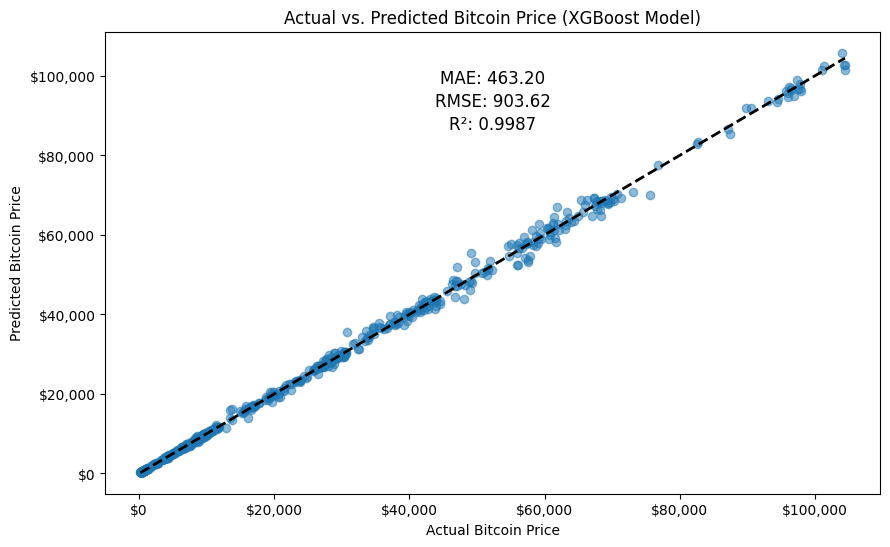

In [ ]:
# Create the actual vs predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)  # Use y_pred_final from the optimized model
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# change format of x and y axis to be usd with a comma
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))
# Set the axis labels
plt.xlabel("Actual Bitcoin Price")
plt.ylabel("Predicted Bitcoin Price")
plt.title("Actual vs. Predicted Bitcoin Price (XGBoost Model)")
# Display the metrics on the plot
plt.text(0.5, 0.9, f"MAE: {mae:.2f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.5, 0.85, f"RMSE: {rmse:.2f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.5, 0.8, f"R²: {r2:.4f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.show()
